In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [2]:
df = xr.open_dataset('C:/Users/eirik/Master/Data/new_dataset.nc')
df_eta = xr.open_dataset('C:/Users/eirik/Master/Data/Eta.nc')

In [3]:
OW = df['Okubo_Weiss']*(1/(10**(-9)))
eta = df_eta['Eta']

In [4]:
OW = OW.sel(time='2018-03-31T00:00:00.000000000')
OW = OW.sel(X=slice(-20,0))
OW = OW.sel(Y=slice(72,73))
OW = OW.sel(Z=-1)
eta = eta.sel(time='2018-03-31T00:00:00.000000000')
eta = eta.sel(X=slice(-20,0))
eta = eta.sel(Y=slice(72,73))

In [5]:
display(OW,eta)

<xarray.DataArray 'Okubo_Weiss' (Y: 47, X: 435)>
array([[ 5.61061491e-02,  3.39343508e-03, -1.14188350e-02, ...,
        -2.73371846e-01,  9.28715364e-01,  4.66645145e+00],
       [ 2.11830381e-02, -4.82414125e-02, -3.61105491e-02, ...,
         1.09902520e+00, -7.07030124e-01, -3.58941467e+00],
       [-1.21032703e-01, -1.54546179e-01, -4.76496286e-02, ...,
         7.59447273e-02, -1.45798822e+00, -5.52448886e+00],
       ...,
       [-6.90761742e-02, -7.98488420e-02, -3.88542459e-02, ...,
         5.77155153e-02,  2.05877460e-01,  2.15301968e-01],
       [-3.56263673e-02, -6.66998679e-02, -1.69690434e-02, ...,
         7.33538251e-02,  1.07870813e-01,  9.86616767e-02],
       [ 2.98470662e-02, -4.33857700e-02, -5.39179883e-02, ...,
         1.47019427e-01,  1.36719004e-01,  1.86554233e-01]])
Coordinates:
    Z        float64 -1.0
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31

<xarray.DataArray 'Eta' (Y: 47, X: 435)>
[20445 values with dtype=float64]
Coordinates:
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

In [6]:
from detection import eddyDetection

In [7]:
Eddy_locations = eddyDetection(eta,OW)

Generating Frames: 100%|██████████| 39/39 [00:30<00:00,  1.26it/s]

Skiped windows %: 85.02972437398667


In [8]:
display(len(Eddy_locations[0]),len(Eddy_locations[1]))

21

28

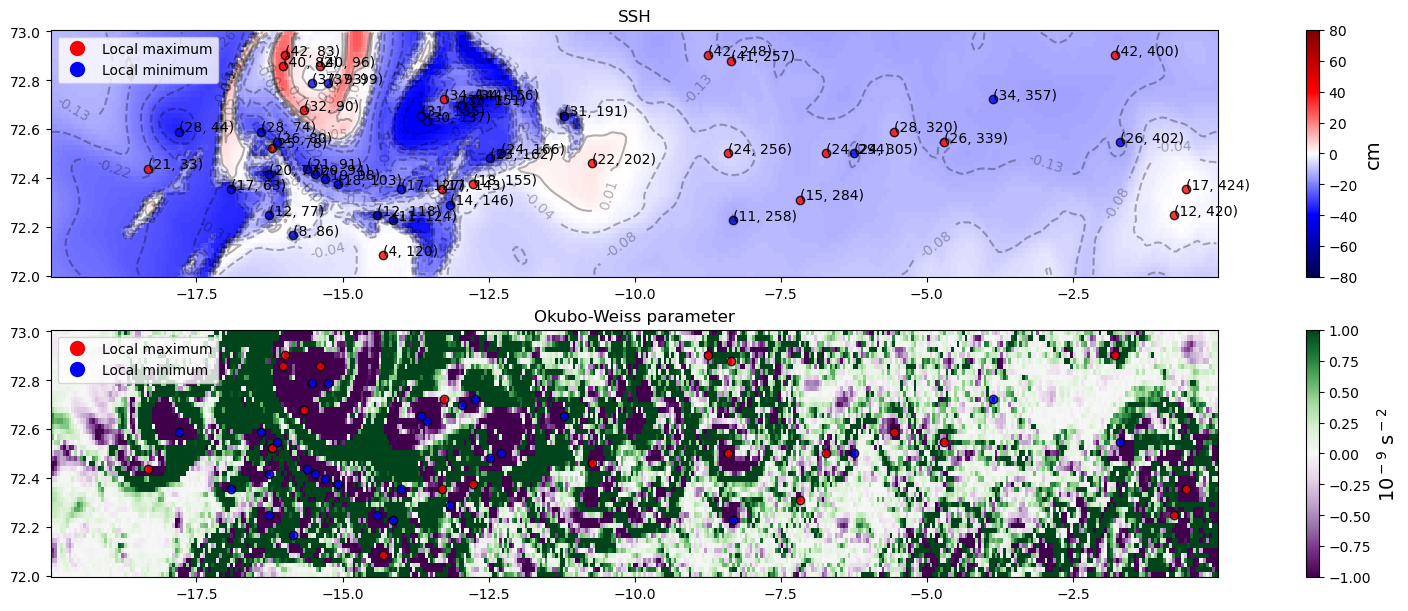

In [9]:
import matplotlib.lines as mlines

cmap = 'seismic'
fig, (ax1,ax2) = plt.subplots(2,1,figsize=[14,6],layout='constrained')

mesh = ax1.pcolormesh(eta.X,eta.Y,eta*100,cmap=cmap,vmin=-80,vmax=80)
cbar = fig.colorbar(mesh)
cbar.set_label('cm',fontsize=14)
cntr = ax1.contour(eta.X,eta.Y,eta,np.linspace(-0.4,0.1,12),colors='black',alpha=0.3)
ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

ax1.set_title('SSH')

for i in Eddy_locations[0]:
    sct1 = ax1.scatter(eta.X[i[1]],eta.Y[i[0]],color='red',edgecolor='black',alpha=0.8)
    ax1.annotate(f'{i}',[eta.X[i[1]],eta.Y[i[0]]])

for i in Eddy_locations[1]:
    sct2 = ax1.scatter(eta.X[i[1]],eta.Y[i[0]],color='blue',edgecolor='black',alpha=0.8)
    ax1.annotate(f'{i}',[eta.X[i[1]],eta.Y[i[0]]])


# Create custom legend handles using Line2D
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Local maximum')
blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Local minimum')

# Add the legend to the plot
ax1.legend(handles=[red_circle, blue_circle])

cmap = 'PRGn'

mesh = ax2.pcolormesh(OW.X,OW.Y,OW,cmap=cmap,vmin=-1,vmax=1)
cbar = fig.colorbar(mesh)
cbar.set_label('10$^-$$^9$ s$^-$$^2$',fontsize=14)

ax2.set_title('Okubo-Weiss parameter')

for i in Eddy_locations[0]:
    sct1 = ax2.scatter(eta.X[i[1]],eta.Y[i[0]],color='red',edgecolor='black',alpha=0.8)
    

for i in Eddy_locations[1]:
    sct2 = ax2.scatter(eta.X[i[1]],eta.Y[i[0]],color='blue',edgecolor='black',alpha=0.8)


# Create custom legend handles using Line2D
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Local maximum')
blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Local minimum')

# Add the legend to the plot
ax2.legend(handles=[red_circle, blue_circle])

In [10]:
display(Eddy_locations[0][10])

(25, 78)

In [11]:
display(eta.X[202].values,eta.Y[22].values)

array(-10.73752722)

array(72.460275)

In [12]:
from detection import inner_eddy_region

In [13]:
display(Eddy_locations[1][18])

(28, 44)

In [14]:
test_eddy = Eddy_locations[0][7]
display(len(eta.X),len(eta.Y))
display(test_eddy[1])
test = inner_eddy_region(eta,test_eddy,warm=True)

435

47

202

Xmin:  -0.00012556933742790405
Xmax:  -0.0003915263963383958
-0.0061954471271057215
Domain of eddy:  [[190, 246], [-2, True]]
Domain of eddy XY:  [[184, 4], [226, 46], [192, 32], [223, 1]]
TotDomain:  [184, 246] [-2, 46]


Text(0.5, 1.0, 'Y-axis')

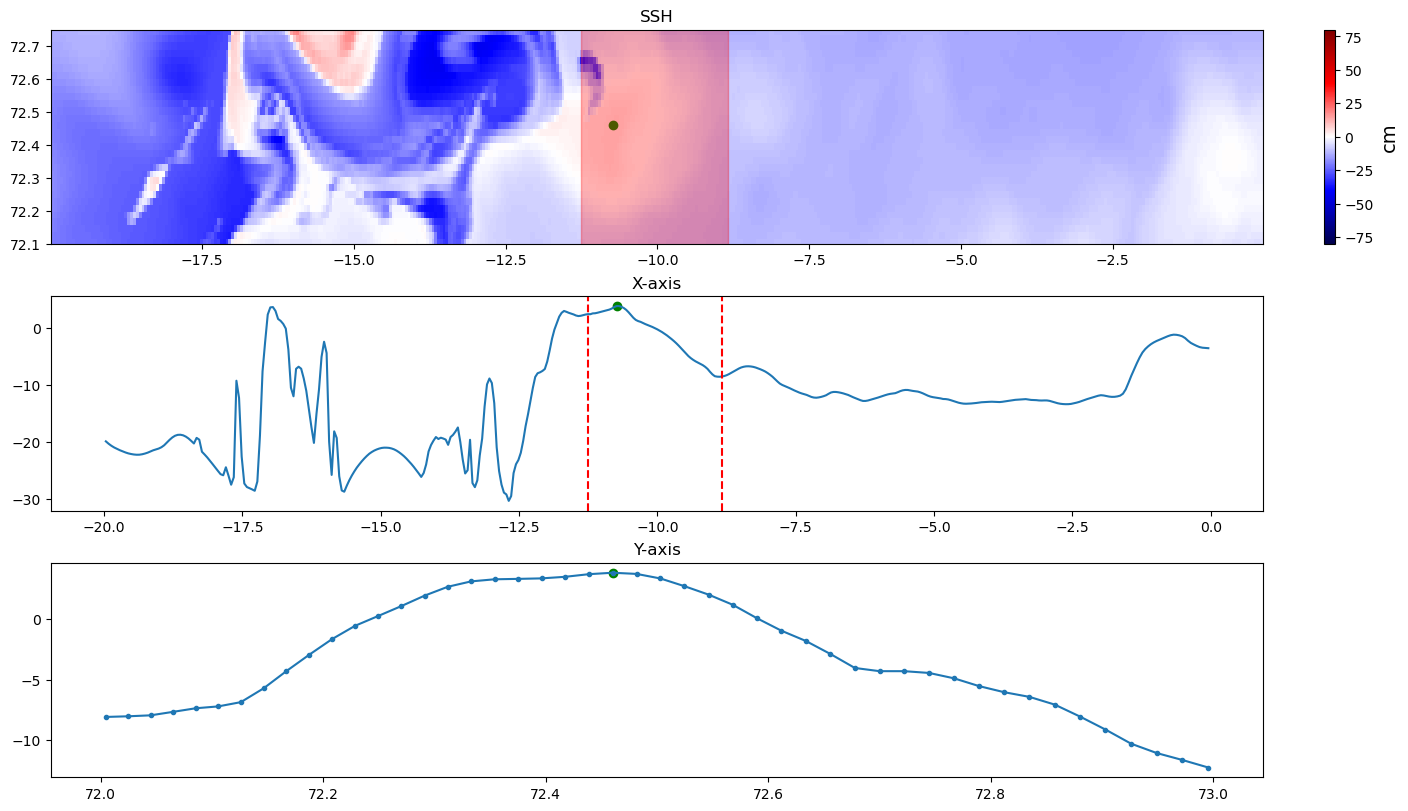

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=[14,8],layout='constrained')

cmap = 'seismic'
mesh = ax1.pcolormesh(eta.X,eta.Y,eta*100,cmap=cmap,vmin=-80,vmax=80)
cbar = fig.colorbar(mesh)
cbar.set_label('cm',fontsize=14)
# cntr = ax1.contour(eta.X,eta.Y,eta,np.linspace(-0.4,0.1,21),colors='black',alpha=0.3)
# ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

ax1.scatter(eta.X[202].values,eta.Y[22],color='green')

ax1.set_title('SSH')
#ax1.set_xlim(-12.5,-8.5)
ax1.set_ylim(72.1,72.75)

ax1.fill([eta.X[190],eta.X[246],eta.X[246],eta.X[190]],[eta.Y[0],eta.Y[0],eta.Y[46],eta.Y[46]],color='red',alpha=0.3)

# SSH X dir around center
SSH = eta.sel(Y=eta.Y[22].values)
ax2.plot(SSH.X,SSH*100)
#ax2.set_xlim(-12.5,-8.5)
#ax2.set_ylim(-10,5)
ax2.scatter(eta.X[202],SSH[202]*100,color='green')
ax2.axvline(x=eta.X[190],color='r',linestyle='--')
ax2.axvline(x=eta.X[246],color='red',linestyle='--')
ax2.set_title('X-axis')

SSH = eta.sel(X=eta.X[202].values)
ax3.plot(SSH.Y,SSH*100,'.-')
ax3.scatter(eta.Y[22],SSH[22]*100,color='green')
# ax3.axvline(x=eta.Y[7],color='r',linestyle='--')
# ax3.axvline(x=eta.Y[32],color='red',linestyle='--')
#ax3.set_xlim(72.4,72.55)
#ax3.set_ylim(2,4)
ax3.set_title('Y-axis')


In [16]:
std_OW = OW.std()

In [17]:
std_OW.values*-0.2

-0.901991884460411

In [18]:
for i in range(10):
    if i == 2:
        continue
    print(i)

0
1
3
4
5
6
7
8
9


In [19]:
eta

<xarray.DataArray 'Eta' (Y: 47, X: 435)>
array([[-0.196362, -0.198819, -0.201045, ..., -0.075386, -0.073723, -0.070214],
       [-0.198528, -0.201305, -0.203602, ..., -0.072279, -0.07152 , -0.068847],
       [-0.200433, -0.203501, -0.205831, ..., -0.068323, -0.068312, -0.066137],
       ...,
       [-0.105652, -0.105838, -0.106122, ..., -0.115708, -0.11727 , -0.118497],
       [-0.106473, -0.106582, -0.106741, ..., -0.117393, -0.118942, -0.120148],
       [-0.107477, -0.10754 , -0.107642, ..., -0.119802, -0.121019, -0.122279]])
Coordinates:
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

In [20]:
grid = np.zeros((47,435))
display(grid)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
print(len(grid),len(grid[0]))

47 435


In [22]:
eddies = xr.full_like(eta,fill_value=0)
eddies = eddies.rename("EddyDetection")
for j in range(47):
    for i in range(435):
        eddies[j][i] = 1+i*2

In [23]:
display(eddies)

<xarray.DataArray 'EddyDetection' (Y: 47, X: 435)>
array([[  1.,   3.,   5., ..., 865., 867., 869.],
       [  1.,   3.,   5., ..., 865., 867., 869.],
       [  1.,   3.,   5., ..., 865., 867., 869.],
       ...,
       [  1.,   3.,   5., ..., 865., 867., 869.],
       [  1.,   3.,   5., ..., 865., 867., 869.],
       [  1.,   3.,   5., ..., 865., 867., 869.]])
Coordinates:
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

In [24]:
xrange = np.arange(0,435)
yrange = np.arange(44,47)

for j in yrange:
    for i in xrange:
        if 5 > eddies[j][i] > 2 or eddies[j][i] ==865:
            continue
        eddies[j][i] = -1
# eddies = eddies.where(eddies.X+eddies.Y<5,-1)
display(eddies)

<xarray.DataArray 'EddyDetection' (Y: 47, X: 435)>
array([[  1.,   3.,   5., ..., 865., 867., 869.],
       [  1.,   3.,   5., ..., 865., 867., 869.],
       [  1.,   3.,   5., ..., 865., 867., 869.],
       ...,
       [ -1.,   3.,  -1., ..., 865.,  -1.,  -1.],
       [ -1.,   3.,  -1., ..., 865.,  -1.,  -1.],
       [ -1.,   3.,  -1., ..., 865.,  -1.,  -1.]])
Coordinates:
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
    time     datetime64[ns] 2018-03-31
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter